## 1. Create dataframe by web scraping

Use the Notebook to build the code to scrape the following Wikipedia page,https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M,
in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe.

In [21]:
# import library
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests # library to handle requests
import urllib.request
from bs4 import BeautifulSoup

import numpy as np # library to handle data in a vectorized manner

In [3]:
# query the page and put the HTML data into a variable 
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
page = urllib.request.urlopen(url)

In [4]:
# parse the HTML data we stored in our ‘url’ variable and store it in a new variable called ‘soup’ in the Beautiful Soup format
soup = BeautifulSoup(page,"lxml")

In [5]:
# find table
table=soup.find('table', class_='wikitable sortable')
table

<table class="wikitable sortable">
<tbody><tr>
<th>Postal Code
</th>
<th>Borough
</th>
<th>Neighborhood
</th></tr>
<tr>
<td>M1A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M2A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3A
</td>
<td>North York
</td>
<td>Parkwoods
</td></tr>
<tr>
<td>M4A
</td>
<td>North York
</td>
<td>Victoria Village
</td></tr>
<tr>
<td>M5A
</td>
<td>Downtown Toronto
</td>
<td>Regent Park, Harbourfront
</td></tr>
<tr>
<td>M6A
</td>
<td>North York
</td>
<td>Lawrence Manor, Lawrence Heights
</td></tr>
<tr>
<td>M7A
</td>
<td>Downtown Toronto
</td>
<td>Queen's Park, Ontario Provincial Government
</td></tr>
<tr>
<td>M8A
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M9A
</td>
<td>Etobicoke
</td>
<td>Islington Avenue, Humber Valley Village
</td></tr>
<tr>
<td>M1B
</td>
<td>Scarborough
</td>
<td>Malvern, Rouge
</td></tr>
<tr>
<td>M2B
</td>
<td>Not assigned
</td>
<td>Not assigned
</td></tr>
<tr>
<td>M3B
</td>
<td>

In [7]:
table_rows = table.find_all('tr')

res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)
        
df = pd.DataFrame(res,columns=['PostalCode','Borough','Neighborhood'])
df.head()

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"


In [8]:
TorontoNeigh = df[df.Borough!='Not assigned'].reset_index(drop=True)
TorontoNeigh

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
5,M9A,Etobicoke,"Islington Avenue, Humber Valley Village"
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [9]:
TorontoNeigh.shape

(103, 3)

## 2.  Add Coordinates to the dataframe 

In order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In [10]:
TorontoNeigh[TorontoNeigh['PostalCode']=='M5G']

,PostalCode,Borough,Neighborhood
24,M5G,Downtown Toronto,Central Bay Street


In [11]:
# use csv file to add coordinates
coords = pd.read_csv('http://cocl.us/Geospatial_data')
coords.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [12]:
# merge dataframe
TorontoNeighCoords=pd.merge(left = TorontoNeigh,right = coords,how='left',left_on='PostalCode',right_on='Postal Code').drop('Postal Code',1)
TorontoNeighCoords.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [13]:
TorontoNeighCoords.shape

(103, 5)

## 3. Explore and cluster the neighborhoods in Toronto
* to add enough Markdown cells to explain what you decided to do and to report any observations you make.
* to generate maps to visualize your neighborhoods and how they cluster together.

### A. Explore the Neighborhoods in Toronto

#### Create a map of Toronto with Neighborhoods

In [14]:
# import library
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

In [15]:
# take Downtown Toronto as map center
latitude = 43.6515
longitude = -79.3835

# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(TorontoNeighCoords['Latitude'], TorontoNeighCoords['Longitude'], TorontoNeighCoords['Borough'], TorontoNeighCoords['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Define Foursquare Credentials and Version

In [31]:
CLIENT_ID = '13D1XGMOZEGUXSP0BIIG5HZFV1E020GTWIPJNFWFUMXYYS4O' # your Foursquare ID
CLIENT_SECRET = '2YH4LB3GE1WTDPQG401GNKKPXPE1Q5AZHAIWBDXGVGIHUWOT' # your Foursquare Secret
VERSION = '20200619' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 13D1XGMOZEGUXSP0BIIG5HZFV1E020GTWIPJNFWFUMXYYS4O
CLIENT_SECRET:2YH4LB3GE1WTDPQG401GNKKPXPE1Q5AZHAIWBDXGVGIHUWOT


#### Let's explore the first neighborhood in our dataframe.

In [32]:
# first row of TorontoNeighborhood
TorontoNeighCoords.loc[0,'Neighborhood']

'Parkwoods'

In [33]:
neighborhood_latitude = TorontoNeighCoords.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = TorontoNeighCoords.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = TorontoNeighCoords.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Parkwoods are 43.7532586, -79.3296565.


#### Now, let's get the top 100 venues that are in Parkwoods within a radius of 500 meters.

In [34]:
# First, let's create the GET request URL. Name your URL **url**.
LIMIT = 100
radius = 500

url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(
    CLIENT_ID, CLIENT_SECRET, neighborhood_latitude, neighborhood_longitude, VERSION, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?client_id=13D1XGMOZEGUXSP0BIIG5HZFV1E020GTWIPJNFWFUMXYYS4O&client_secret=2YH4LB3GE1WTDPQG401GNKKPXPE1Q5AZHAIWBDXGVGIHUWOT&ll=43.7532586,-79.3296565&v=20200619&radius=500&limit=100'

In [35]:
results = requests.get(url).json()
results['response']['groups'][0]['items'][0]

{'reasons': {'count': 0,
  'items': [{'summary': 'This spot is popular',
    'type': 'general',
    'reasonName': 'globalInteractionReason'}]},
 'venue': {'id': '4e8d9dcdd5fbbbb6b3003c7b',
  'name': 'Brookbanks Park',
  'location': {'address': 'Toronto',
   'lat': 43.751976046055574,
   'lng': -79.33214044722958,
   'labeledLatLngs': [{'label': 'display',
     'lat': 43.751976046055574,
     'lng': -79.33214044722958}],
   'distance': 245,
   'cc': 'CA',
   'city': 'Toronto',
   'state': 'ON',
   'country': 'Canada',
   'formattedAddress': ['Toronto', 'Toronto ON', 'Canada']},
  'categories': [{'id': '4bf58dd8d48988d163941735',
    'name': 'Park',
    'pluralName': 'Parks',
    'shortName': 'Park',
    'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/parks_outdoors/park_',
     'suffix': '.png'},
    'primary': True}],
  'photos': {'count': 0, 'groups': []}},
 'referralId': 'e-0-4e8d9dcdd5fbbbb6b3003c7b-0'}

Let's borrow the get_category_type function from the Foursquare lab.

In [36]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe.

In [37]:
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

In [38]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Brookbanks Park,Park,43.751976,-79.332140
1,Variety Store,Food & Drink Shop,43.751974,-79.333114
2,Corrosion Service Company Limited,Construction & Landscaping,43.752432,-79.334661


In [39]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

3 venues were returned by Foursquare.


#### Explore Neighborhoods in Toronto
Let's create a function to repeat the same process to all the neighborhoods in Toronto

In [40]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        #print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [41]:
toronto_venues = getNearbyVenues(names=TorontoNeighCoords['Neighborhood'],
                                   latitudes=TorontoNeighCoords['Latitude'],
                                   longitudes=TorontoNeighCoords['Longitude']
                                  )

In [42]:
print(toronto_venues.shape)
toronto_venues.head()

(2132, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
2,Parkwoods,43.753259,-79.329656,Corrosion Service Company Limited,43.752432,-79.334661,Construction & Landscaping
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Portugril,43.725819,-79.312785,Portuguese Restaurant


Let's check how many venues were returned for each neighborhood

In [43]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Agincourt,4,4,4,4,4,4
"Alderwood, Long Branch",7,7,7,7,7,7
"Bathurst Manor, Wilson Heights, Downsview North",23,23,23,23,23,23
Bayview Village,4,4,4,4,4,4
"Bedford Park, Lawrence Manor East",23,23,23,23,23,23
Berczy Park,58,58,58,58,58,58
"Birch Cliff, Cliffside West",4,4,4,4,4,4
"Brockton, Parkdale Village, Exhibition Place",22,22,22,22,22,22
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",18,18,18,18,18,18


Let's find out how many unique categories can be curated from all the returned venues

In [44]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 270 uniques categories.


### B. Analyze Each Neighborhood

In [45]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# define a list of column names
cols = toronto_onehot.columns.tolist()
cols.insert(0,cols.pop(cols.index('Neighborhood')))

toronto_onehot = toronto_onehot.reindex(columns=cols) 

toronto_onehot.head()

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Parkwoods,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [46]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped.head()

,Neighborhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Business Service,Butcher,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Fabric Shop,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indonesian Restaurant,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Market,Martial Arts Dojo,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Moving Target,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,

In [47]:
toronto_grouped.shape

(95, 270)

In [48]:
num_top_venues = 3

for hood in toronto_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agincourt----
                       venue  freq
0                     Lounge  0.25
1  Latin American Restaurant  0.25
2               Skating Rink  0.25


----Alderwood, Long Branch----
         venue  freq
0  Pizza Place  0.29
1          Gym  0.14
2     Pharmacy  0.14


----Bathurst Manor, Wilson Heights, Downsview North----
               venue  freq
0               Bank  0.09
1        Coffee Shop  0.09
2  Convenience Store  0.04


----Bayview Village----
                 venue  freq
0                 Café  0.25
1                 Bank  0.25
2  Japanese Restaurant  0.25


----Bedford Park, Lawrence Manor East----
                venue  freq
0      Sandwich Place  0.09
1          Restaurant  0.09
2  Italian Restaurant  0.09


----Berczy Park----
          venue  freq
0   Coffee Shop  0.09
1  Cocktail Bar  0.05
2    Restaurant  0.03


----Birch Cliff, Cliffside West----
                   venue  freq
0        College Stadium  0.25
1           Skating Rink  0.25
2  General Entertain

                        venue  freq
0                        Park  0.33
1           Food & Drink Shop  0.33
2  Construction & Landscaping  0.33


----Queen's Park, Ontario Provincial Government----
              venue  freq
0       Coffee Shop  0.25
1  Sushi Restaurant  0.06
2             Diner  0.06


----Regent Park, Harbourfront----
         venue  freq
0  Coffee Shop  0.16
1       Bakery  0.07
2          Pub  0.07


----Richmond, Adelaide, King----
         venue  freq
0  Coffee Shop  0.10
1         Café  0.05
2   Restaurant  0.04


----Rosedale----
        venue  freq
0        Park  0.50
1  Playground  0.25
2       Trail  0.25


----Roselawn----
            venue  freq
0  Ice Cream Shop  0.33
1          Garden  0.33
2     Music Venue  0.33


----Rouge Hill, Port Union, Highland Creek----
                 venue  freq
0         Home Service   0.5
1                  Bar   0.5
2  Monument / Landmark   0.0


----Runnymede, Swansea----
                venue  freq
0                Café  

#### Let's print each neighborhood along with the top 5 most common venues

First, let's write a function to sort the venues in descending order.

In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [50]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Breakfast Spot,Latin American Restaurant,Lounge,Skating Rink,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
1,"Alderwood, Long Branch",Pizza Place,Coffee Shop,Gym,Pub,Pharmacy,Sandwich Place,Discount Store,Department Store,Dessert Shop,Dim Sum Restaurant
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Fried Chicken Joint,Diner,Ice Cream Shop,Supermarket,Sushi Restaurant,Restaurant,Middle Eastern Restaurant,Mobile Phone Shop
3,Bayview Village,Café,Chinese Restaurant,Bank,Japanese Restaurant,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Department Store
4,"Bedford Park, Lawrence Manor East",Coffee Shop,Sandwich Place,Restaurant,Italian Restaurant,Juice Bar,Thai Restaurant,Butcher,Café,Sushi Restaurant,Indian Restaurant


In [51]:
neighborhoods_venues_sorted.shape

(95, 11)

### C. Cluster Neighborhoods

In [52]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

In [74]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [65]:
toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

In [94]:
# choose best kclusters 
inertia =[]
kmax = 10
for k in range(2,kmax+1): 
        kmeans = KMeans(n_clusters=k,random_state=0).fit(toronto_grouped_clustering)
        inertia.append(kmeans.inertia_) # the sum of squared distance to the nearest cluster centre
        

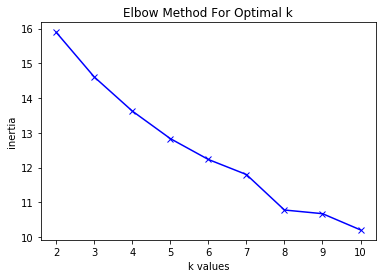

In [95]:
plt.plot(range(2,kmax+1),inertia,'bx-')
plt.xlabel('k values')
plt.ylabel('inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [96]:
# set number of clusters
kclusters = 8

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(init = "k-means++",n_clusters=kclusters, random_state=0,n_init = 12).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 4, 1, 1])

In [97]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 5, 6, 1, 7, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 6,
       1, 1, 1, 0, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 2, 1,
       6, 1, 1, 1, 1, 1, 3])

In [98]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = TorontoNeighCoords

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood',how='right')

toronto_merged.head() # check the last columns!

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M3A,North York,Parkwoods,43.753259,-79.329656,3,Park,Food & Drink Shop,Construction & Landscaping,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
1,M4A,North York,Victoria Village,43.725882,-79.315572,1,French Restaurant,Hockey Arena,Coffee Shop,Intersection,Pizza Place,Portuguese Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Pub,Bakery,Park,Restaurant,Breakfast Spot,Café,Theater,Yoga Studio,Event Space
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763,1,Clothing Store,Accessories Store,Vietnamese Restaurant,Boutique,Miscellaneous Shop,Furniture / Home Store,Event Space,Coffee Shop,Concert Hall,Dessert Shop
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1,Coffee Shop,Diner,Sushi Restaurant,College Auditorium,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café


Finally, let's visualize the resulting clusters

In [99]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [108]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
50,Humber Summit,0,Pizza Place,Yoga Studio,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
63,"Runnymede, The Junction North",0,Convenience Store,Pizza Place,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Yoga Studio


In [109]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Victoria Village,1,French Restaurant,Hockey Arena,Coffee Shop,Intersection,Pizza Place,Portuguese Restaurant,Department Store,Dessert Shop,Dim Sum Restaurant,Diner
2,"Regent Park, Harbourfront",1,Coffee Shop,Pub,Bakery,Park,Restaurant,Breakfast Spot,Café,Theater,Yoga Studio,Event Space
3,"Lawrence Manor, Lawrence Heights",1,Clothing Store,Accessories Store,Vietnamese Restaurant,Boutique,Miscellaneous Shop,Furniture / Home Store,Event Space,Coffee Shop,Concert Hall,Dessert Shop
4,"Queen's Park, Ontario Provincial Government",1,Coffee Shop,Diner,Sushi Restaurant,College Auditorium,Bar,Beer Bar,Smoothie Shop,Sandwich Place,Burrito Place,Café
7,Don Mills,1,Coffee Shop,Gym,Beer Store,Japanese Restaurant,Asian Restaurant,Restaurant,Café,Bike Shop,Shopping Mall,Sandwich Place
13,Don Mills,1,Coffee Shop,Gym,Beer Store,Japanese Restaurant,Asian Restaurant,Restaurant,Café,Bike Shop,Shopping Mall,Sandwich Place
8,"Parkview Hill, Woodbine Gardens",1,Pizza Place,Gym / Fitness Center,Pharmacy,Bank,Intersection,Athletics & Sports,Café,Gastropub,Fast Food Restaurant,Breakfast Spot
9,"Garden District, Ryerson",1,Clothing Store,Coffee Shop,Middle Eastern Restaurant,Japanese Restaurant,Bubble Tea Shop,Italian Restaurant,Cosmetics Shop,Café,Theater,Bakery
10,Glencairn,1,Japanese Restaurant,Sushi Restaurant,Park,Pub,Asian Restaurant,Pizza Place,Distribution Center,Dessert Shop,Dim Sum Restaurant,Diner
12,"Rouge Hill, Port Union, Highland Creek",1,Bar,Home Service,Yoga Studio,Department Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant


In [110]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,"West Deane Park, Princess Gardens, Martin Grov...",2,Golf Course,Yoga Studio,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop


In [111]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Parkwoods,3,Park,Food & Drink Shop,Construction & Landscaping,Doner Restaurant,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
49,"North Park, Maple Leaf Park, Upwood Park",3,Park,Construction & Landscaping,Bakery,Basketball Court,Electronics Store,Eastern European Restaurant,Ethiopian Restaurant,Dumpling Restaurant,Drugstore,Dessert Shop
66,York Mills West,3,Park,Construction & Landscaping,Convenience Store,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Ethiopian Restaurant,Department Store,Donut Shop
101,"Old Mill South, King's Mill Park, Sunnylea, Hu...",3,Construction & Landscaping,Baseball Field,Yoga Studio,Donut Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Drugstore


In [112]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
51,"Cliffside, Cliffcrest, Scarborough Village West",4,American Restaurant,Motel,Deli / Bodega,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Yoga Studio


In [113]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 5, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,"Malvern, Rouge",5,Fast Food Restaurant,Yoga Studio,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop


In [114]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 6, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Caledonia-Fairbanks,6,Park,Pool,Women's Store,Yoga Studio,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center
64,Weston,6,Park,Deli / Bodega,Ethiopian Restaurant,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,Dog Run
85,"Milliken, Agincourt North, Steeles East, L'Amo...",6,Park,Playground,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Doner Restaurant
91,Rosedale,6,Park,Playground,Trail,Yoga Studio,Dog Run,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store
98,"The Kingsway, Montgomery Road, Old Mill North",6,Park,River,Electronics Store,Eastern European Restaurant,Dumpling Restaurant,Drugstore,Donut Shop,Doner Restaurant,College Auditorium,Distribution Center


In [115]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 7, toronto_merged.columns[[2] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32,Scarborough Village,7,Grocery Store,Playground,Doner Restaurant,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Donut Shop
83,"Moore Park, Summerhill East",7,Tennis Court,Playground,Yoga Studio,Distribution Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dog Run
